# Métodos de validación, nos sirven para separar los datos de manera adecuada 

In [2]:
import pandas as pd
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
iris = pd.read_csv('iris.csv')
iris.Clase.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Clase, dtype: int64

In [4]:
iris.head()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = iris.iloc[:,:-1].values
y = iris.iloc[:,-1].values

In [6]:
X[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Hold out 
**sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)**

Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and next(ShuffleSplit().split(X, y)) and application to input data into a single call for splitting (and optionally subsampling) data in a oneliner.

- shuffle:  por defecto es shuffle=true - desordena. Si shuffle=false, entonces, va en orden.
- stratify: por defecto no está estratificado. Hay que decirle el array o lista con el que se quiere estratificar, generalmente - el target. Si stratified, entonces, shuffle tiene que ser true (es imposible que esté ordenado y le obliguemos que los targets sean proporcionales)
- random_state: si shuffle, le podemos decir que desordene siempre igual.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, stratify=y, random_state=1)
#Hold out (train_test_split) -> shuffle: por defecto es shuffle - desordena. Shuffle false entonces, va en orden.
#Hold out (train_test_split) -> stratify: por no está estratificado. 
#                               Hay que decirle el array o lista con el que se quiere estratificar, generalmente el target.
#                               Shuffle true por defecto, si stratified, entonces tiene que hacerse shuffle (es imposible
#                               que esté ordenado y le obliguemos a los targets sean proporcionales)
#                               random_state: si shuffle, le podemos decir que desordene siempre igual.

In [8]:
print(np.unique(y_test, return_counts=True))
print(X_test[:5,:])

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([15, 15, 15], dtype=int64))
[[6.2 3.4 5.4 2.3]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [4.9 2.5 4.5 1.7]
 [6.6 3.  4.4 1.4]]


In [9]:
accuracies = np.array([])

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y)

    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc  = accuracy_score(y_test,yhat)
    accuracies = np.hstack((accuracies, acc))
    
    #print("Accuracy: ", accuracy_score(y_test,yhat))

print(accuracies) # cada muestra (split) da un resultado distinto
print(accuracies.mean())

[0.95555556 0.97777778 0.97777778 0.93333333 0.93333333 0.97777778
 0.97777778 1.         0.95555556 0.97777778]
0.9666666666666666


# Kfold
**class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)**

K-Folds cross-validator

Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

- random_state: si shuffle, le podemos decir que desordene siempre igual.
- shuffle: por defecto es shuffle=false - mantiene el orden. Si shuffle=true, desordena antes de tomar las muestras.
- no estratifica, en un ppio, va ordenado. Se puede desordenar, pero de nuevo, esta clase no permite estratificar (ver Stratified kfold

In [10]:
from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True)

accuracies = np.array([])
i = 0

for train_index, test_index in kf.split(X,y):
    X_train, y_train = X[train_index], y[train_index]
    X_test,  y_test  = X[test_index],  y[test_index]  # crea los splits

    i += 1
    print('fold', i, ':', np.unique(y_test, return_counts=True))
    
    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc  = accuracy_score(y_test,yhat)
    accuracies = np.hstack((accuracies, acc))

print(accuracies) # cada muestra (split) da un resultado distinto
print(accuracies.mean())

# si shuffle false, no varía por ejecución, siempre da el mismo resultado pero bajo (es normal, ya que los targets estan también ordenados)
# si shuffle true, varía en cada, pero mejora la métrica.

fold 1 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([ 1,  4, 10], dtype=int64))
fold 2 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([7, 5, 3], dtype=int64))
fold 3 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([6, 4, 5], dtype=int64))
fold 4 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([1, 7, 7], dtype=int64))
fold 5 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([6, 3, 6], dtype=int64))
fold 6 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 4, 6], dtype=int64))
fold 7 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([4, 8, 3], dtype=int64))
fold 8 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([4, 6, 5], dtype=int64))
fold 9 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],

# Stratified Kfold
**class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)**

Stratified K-Folds cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

- shuffle: defecto, False (mantiene el orden original de las CLASES). Si True, desordena las CLASES antes del split. Ordenado o no, cada fold debe tener el mismo porcentaje de las clases.


In [11]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(10, shuffle=False)

accuracies = np.array([])
y_test_all = np.array([])
yhat_all   = np.array([])

i = 0
for train_index, test_index in skf.split(X,y):
    X_train, y_train = X[train_index], y[train_index]
    X_test,  y_test  = X[test_index],  y[test_index]  # crea los splits
    
    i += 1
    print('fold', i, ':', np.unique(y_test, return_counts=True))

    clf = neighbors.KNeighborsClassifier(13)
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc  = accuracy_score(y_test,yhat)
    
    y_test_all = np.hstack((y_test_all, y_test))
    yhat_all   = np.hstack((yhat_all,   yhat))
    accuracies = np.hstack((accuracies, acc))

print(accuracies) # cada muestra (split) da un resultado distinto
print(accuracies.mean())

confusion_matrix(y_test_all, yhat_all)

# si shuffle false, es estable, siempre el mismo resultado
# si shuffle true, da valores de la métrica distintos, pero tb altos.

fold 1 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 2 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 3 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 4 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 5 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 6 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 7 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 8 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 9 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dt

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

# Kfold cross validation score
**sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)**

Evaluate a score by cross-validation.
Separa implicitamente los subconjuntos de train y de test.

- cv = int número de folds. Son estratificados. Tb puede ser un CV splitter (clase) o una sequencia yield con los arrays de indices. Solo si cv es None (5 folds por defecto) o int, es un StratifyKfold. En otro caso, Kfold (no estratificado)
- scoring = str o método de la métrica a utilizar. Solo admite una. 
- fit_params = parámetros que se pasan al clf.
- error_score = valor a asignar a la métrica cuando se produce un error al entrenar. Por defecto np.nan. Si 'raise', entonces lanza un error (fitfailedwarning)
- groups - ver GroupKfold

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer # para añadirle la métrica

clf = neighbors.KNeighborsClassifier(13)
scores = cross_val_score(clf, X, y, cv=10, scoring= make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

# Si arriba shuffle es igual false, se reproduce exactamente el mismo comportamiento.

[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]
**************************************************
Accuracy:  0.9800000000000001


In [13]:
# validar que k es la óptima, en base a la accuracy

list_accuracy=[]
for i in range(3,50,2):
    clf = neighbors.KNeighborsClassifier(i)
    scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
    list_accuracy.append(scores.mean())
print(list_accuracy)

print('k:', 3 + np.argmax(list_accuracy) * 2, 'accuracy:', list_accuracy[np.argmax(list_accuracy)])
print()

[0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9666666666666666, 0.9733333333333334, 0.9666666666666666, 0.9666666666666666, 0.9533333333333334, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9466666666666667, 0.9533333333333334, 0.9533333333333334, 0.9466666666666667, 0.9333333333333333, 0.9333333333333333, 0.9400000000000001]
k: 13 accuracy: 0.9800000000000001



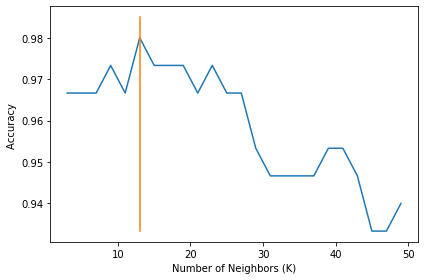

In [14]:
import matplotlib.pyplot as plt

kmax = 3 + np.argmax(list_accuracy) * 2
maxaccuracy = list_accuracy[np.argmax(list_accuracy)]
minaccuracy = list_accuracy[np.argmin(list_accuracy)]

plt.plot([i for i in range(3,50,2)], list_accuracy)
plt.plot([kmax] * 10, np.linspace(minaccuracy, 0.985, 10))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() #Ajusta automáticamente los parámetros de la subtrama
plt.show()

# Leave one out
**class sklearn.model_selection.LeaveOneOut**
Leave-One-Out cross-validator

Provides train/test indices to split data in train/test sets. Each sample is used once as a test set (singleton) while the remaining samples form the training set.

Note: LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.

Due to the high number of test sets (which is the same as the number of samples) this cross-validation method can be very costly. For large datasets one should favor KFold, ShuffleSplit or StratifiedKFold.

No tiene parámetros. No tiene sentido shuffle, o stratify, porque la validación se va a hacer por cada una de las observaciones (test), contra el resto de ellas (train)

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

yhat_all       = np.array([])
yhat_proba_all = np.array([])
#y_test_all = np.array([]) # No es necesario, LeaveOneOut no desordena nunca el dataset

for train_index, test_index in loo.split(X, y): 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=13, p=2, weights='uniform')
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    yhat_proba = clf.predict_proba(X_test)
    
    yhat_all   = np.hstack((yhat_all,   yhat))
    
    if yhat_proba_all.size == 0:
        yhat_proba_all = yhat_proba
    else:
        yhat_proba_all = np.vstack((yhat_proba_all, yhat_proba))


print("Accuracy: ", accuracy_score(y, yhat_all)) # Aqui para obtener el accuracy tengo que comparar
                                                 # yhat con todas las "y"    
# sería el valor de accuracy más fidedigno, ya que construye validando contra todas las observaciones.
# es completamente estable
# ahora es peor k=13

print('confusion_matrix', confusion_matrix(y, yhat_all))

Accuracy:  0.9666666666666667
confusion_matrix [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [16]:
clf.predict([np.array([1,1,1,1])])

array(['Iris-setosa'], dtype=object)

In [17]:
print(clf.predict([X_test[0]]))
print(y_test[0])

['Iris-virginica']
Iris-virginica


# GridSearchCV
**class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)**

Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

- param_grid = diccionario con los hiperparámetros de clf y una lista de los valores que vamos a validar para encontrar los  mejores dependiendo de una métrica dada.
- scoring = las métricas para la que queremos evaluar  el rendimiento del modelo dep. de los hiperparámetros en param_grid
- cv = int número de folds. **Son estratificados**. Tb puede ser un CV splitter (clase) o una sequencia yield con los arrays de indices. Solo si cv es None (5 folds por defecto) o int, es un StratifyKfold. En otro caso, Kfold (no estratificado)
- refit = con esta es la métrica nos determina cual es el mejor estimador (con sus hiperparámetros). Se puede crear una funcion para obtener el mejor estimador dependiendo de un conjunto de métricas (no solo una).

In [18]:
from sklearn.model_selection import GridSearchCV

clf = neighbors.KNeighborsClassifier()

params_dict = {'n_neighbors' : [i for i in range(3,21,2)],
               'weights'     : ['uniform', 'distance'],
               'algorithm'   : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size'   : [10,20,30],
               'p'           : [1,2]   
}
scores = ['accuracy']

gcv = GridSearchCV(estimator = clf, cv=10, param_grid=params_dict, scoring=scores, refit='accuracy', verbose=2)

In [19]:
model_solver = gcv.fit(X,y)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=3, p=2, weigh

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=

[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=2, weights=

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbo

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_ne

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighb

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbo

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=7, p=2, wei

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=11, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_n

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n

[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=19,

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, w

[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform, 

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n

[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=15, p

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=1, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbo

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neig

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform 
[CV] 

[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=distance 

[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=15, p=2, weights=d

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=19, p=2, weights=unif

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3, p=2, weights=distance 

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=1, weights=distance

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV] 

[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=13, p=1, weights=distance, 

[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=17, p=1, weights=uniform, total=

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=19, p=1, weigh

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform 
[CV]  a

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=2, weights=distance 

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=1, weights=distance 
[CV]  alg

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=11, p=2, weights=dis

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=15, p=1, weig

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=17, p=2, weights=d

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform 
[CV]  algorith

[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf

[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=7, p=2, weights=distance 
[CV]  algorithm=brute,

[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=11, p=1, weights=distance 
[CV]  algo

[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=13, p=2, weights=distance 
[CV]  algorithm=bru

[CV]  algorithm=brute, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=17, p=1, weights=uniform 
[CV]  algorithm=b

[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=19, p=2, weights=distance 
[CV]  algorithm=bru

[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=3, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=brute, le

[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=uniform 
[CV]  algorithm=brute, leaf

[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=9, p=2, weights=distance 
[CV]  algorithm=brute, le

[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13, p=1, weights=uniform 
[CV]  algorithm=bru

[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=15, p=2, weights=distance 
[CV]  algorithm=b

[CV] algorithm=brute, leaf_size=20, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=20, n_neighbors=19, p=1, weights=uniform, total=   0.0s
[CV] algorithm=bru

[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=3, p=1, weights=distance 
[CV]  algorithm=brute, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=3

[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=9, p=1, weights=uniform 
[CV]  algorithm=brute, leaf_size=3

[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11, p=2, weights=distance 
[CV]  algorithm

[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=1, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=15, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=15, p=2, weights=uniform 
[CV]  algorithm

[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=uniform, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=17, p=2, weights=distance 
[CV]  algor

[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:   13.6s finished


In [20]:
best_estimator = model_solver.best_estimator_

In [21]:
best_params = model_solver.best_params_
best_params

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

In [22]:
model_solver.best_score_

0.9800000000000001

### Probamos con validation: StratifiedKFold

In [23]:
skf = StratifiedKFold(10, shuffle=False)

accuracies = np.array([])
y_test_all = np.array([])
yhat_all   = np.array([])

i = 0
for train_index, test_index in skf.split(X,y):
    X_train, y_train = X[train_index], y[train_index]
    X_test,  y_test  = X[test_index],  y[test_index]  # crea los splits
    
    i += 1
    print('fold', i, ':', np.unique(y_test, return_counts=True))

    clf = neighbors.KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_neighbors=13, p=2, weights='uniform')
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    acc  = accuracy_score(y_test,yhat)
    
    y_test_all = np.hstack((y_test_all, y_test))
    yhat_all   = np.hstack((yhat_all,   yhat))
    accuracies = np.hstack((accuracies, acc))

print(accuracies) # cada muestra (split) da un resultado distinto
print(accuracies.mean())

confusion_matrix(y_test_all, yhat_all)

# si shuffle false, es estable, siempre el mismo resultado
# si shuffle true, da valores de la métrica distintos, pero tb altos.

fold 1 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 2 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 3 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 4 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 5 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 6 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 7 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 8 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([5, 5, 5], dtype=int64))
fold 9 : (array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dt

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)